# <font style="color:rgb(50,120,229)">Brightness Enhancement</font>
Brightness is a measure of light falling on the scene. In RGB color space, it can be thought of as the arithmetic mean of the R, G and B color values. To make an image brighter, the intensity values should be increased by some offset ( $\beta$ ) and vice-versa. 

If $I$ is the input image, and $I_o$ is the output image, brightness enhanced image is given by the equation 

$$
I_o = I + \beta
$$

## <font style="color:rgb(50,120,229)">Code for Brightness Enhancement</font>

In the code below, we will apply the above mentioned formulas to get brightness enhanced images.

We will increase the brightness by 50 intensity levels. ( Note that there are 255 intensity levels in a image)

In [1]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read image
image = cv2.imread(DATA_PATH+"images/boy.jpg")

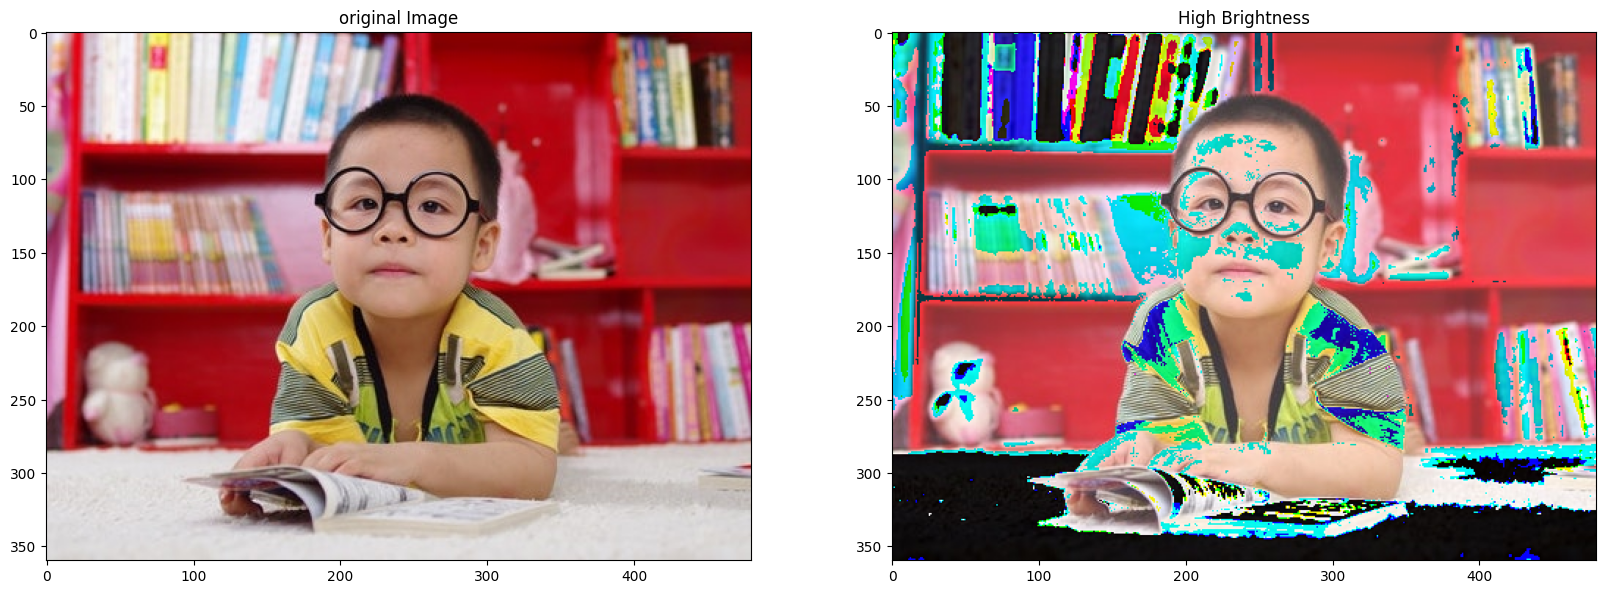

In [3]:
brightnessOffset = 50        # adding 50 to the pixel values (where pixel values are in the range 0-255)

# Add the offset for increasing brightness
brightHigh = image + brightnessOffset         # wrong - pixel values greater than 255 will be clipped to 255

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(brightHigh[...,::-1]);plt.title("High Brightness");

## <font style="color:rgb(50,120,229)">What's wrong?</font>
Why did these simple operations gave such undesirable results? To answer that, let us do a quick check of the image properties.


In [7]:
print("Original Image Datatype : {}".format(image.dtype))
print("Brightness Image Datatype : {}\n".format(brightHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Brightness Image Highest Pixel Intensity : {}".format(brightHigh.max()))


Original Image Datatype : uint8
Brightness Image Datatype : uint8

Original Image Highest Pixel Intensity : 255
Brightness Image Highest Pixel Intensity : 255


### <font style="color:rgb(8,133,37)">Issue with Brightness Enhancement Code </font>
The highest pixel intensity in the original image is 255. Since we have added 50 to each pixel, the highest pixel intensity in `brightHigh` image should have been `305`. But we can see that the highest pixel intensity is in brightHigh image is `255`.

This is happening because of the uint8 datatype. Since the maximum value that a unsigned 8 bit integer can hold is 255, any value greater than that is causing an **`overflow`**.

This is a much more serious problem than the display issue we encountered earlier. These kind of bugs go undetected and cause havoc in the final application as they will be difficult to debug also.

Let us take an example to understand what was going on in the above case.

In [4]:
# Sample 2x2 matrix of type uint8
a = np.array([[100, 110], 
              [120, 130]], dtype='uint8')
print(a)

[[100 110]
 [120 130]]


In [5]:
# Add 130 so that the last element encounters overflow
print(a + 130)

[[230 240]
 [250   4]]


You can see that the element a[1,1] should have been 260. but instead it overflowed and rolled over. There will be a similar problem if we subtract.

Let us see another interesting nuisance.

In [6]:
print(a - 130)

[[226 236]
 [246   0]]


And this?

In [7]:
print(a + (-130))

[[-30 -20]
 [-10   0]]


In [12]:
print((a+(-130)).dtype)

int16


In the first case, both operands (a and 130) are uint8 and thus the output is uint8 and hence the underflow.

But in the second case, the 2nd operand has a type int16. Thus, the final output becomes int16 and thus, doesnt underflow.

This shows a major Pitfall of using uint8 while dealing with arithmetic operations on images.

Thus, it is important to convert the images to int or float(recommended) data types while doing arithmetic operations (like addition, subraction multiplication etc) on images to avoid undesirable results.

### <font style="color:rgb(8,133,37)">Solution </font>
In order to get rid of this problem, we can do the following:
1. use opencv to handle uint8 arithmetic
1. we should do all mathematical operations at a high dynamic range by converting the datatype of the operands to higher order integers or float, whichever is applicable.

We will see how to get the resolve these issues and get the correct outputs.

### <font style="color:rgb(8,133,37)">Solution 1 : Use opencv functions</font>

In [13]:
print(cv2.add(a,130))

[[230 240]
 [250 255]]


Clipping

### <font style="color:rgb(8,133,37)">Solution 2a: Convert to int32/int64</font>

You should convert to higher integer types to avoid overflow and underflow situations. 
Perform clipping if necessary and bring it back to uint8 in the final stage as that is what the display functions expect.

In [14]:
a_int32 = np.int32(a)
b = a_int32+130
print(b)

[[230 240]
 [250 260]]


In [15]:
print(b.clip(0,255))
b_uint8 = np.uint8(b)
b_uint8

[[230 240]
 [250 255]]


array([[230, 240],
       [250,   4]], dtype=uint8)

You can do the same with float datatype as well

### <font style="color:rgb(8,133,37)">Solution 2b: Convert to normalized float32/float64 </font>



It is a good practice to convert the uint8 to float and normalize the range to [0,1] and change it back to [0,255] after doing all arithmetic operations

In [16]:
a_float32 = np.float32(a)/255
b = a_float32 + 130/255
print(b)

[[0.90196085 0.94117653]
 [0.9803922  1.0196079 ]]


In [17]:
c = b*255
print("Output = \n{}".format(c))
print("Clipped output= \n{}".format(c.clip(0,255)))
b_uint8 = np.uint8(c.clip(0,255))
print("uint8 output = \n{}".format(b_uint8))

Output = 
[[230.00002 240.00002]
 [250.00002 260.     ]]
Clipped output= 
[[230.00002 240.00002]
 [250.00002 255.     ]]
uint8 output = 
[[230 240]
 [250 255]]
